<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Classification Metrics I

_Authors: Matt Brems (DC), Riley Dallas (AUS)_

---

## Importing libraries
---

We'll need the following libraries for today's lecture:
1. `pandas`
4. `KNeighborsClassifier` from `sklearn`'s `neighbors` module
5. The `load_breast_cancer` dataset from `sklearn`'s `datasets` module
6. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
7. `StandardScaler` from `sklearn`'s `preprocessing` module
8. The `confusion_matrix` function from `sklearn`'s `metrics` module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## Create dataset
---

Similar to `load_iris` covered in our previous lesson, we'll call the `load_breast_cancer()` function to create our dataset.

In [2]:
data = load_breast_cancer()

## Create `X` and `y`
---

The dataset labels benign tumors as 1, and malignant tumors as 0. So, we'll do a `1 - data.target` to inverse this and reflect "1" for malignant and "0" for benign.

*Note: This is contrary to how you typically label data: the more important class (malignant) should be labeled 1.*

In [3]:
X = data.data # as covered in knn lesson, this gets us our features/'X' matrix
y = 1 - data.target # as covered in knn lesson, this gets us our response/'y' vector

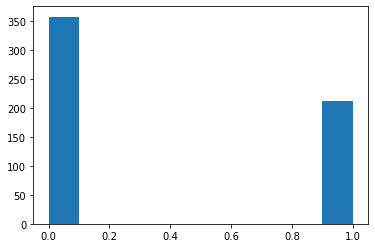

In [4]:
# Check if our y is imbalanced
plt.hist(y);

Our data is clearly imbalanced! The $1$ class is present roughly half as many times as the $0$ class

## Train/Test Split
---

In the cell below, train/test split your `X` and `y` variables. 

**Note** we'll want to create a stratified split since our data is imbalanced.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y) # stratified train-test split

## Scaling our features
---

Because we're using KNN for our model, we'll want to scale our training and testing sets, as covered in previous lesson.

In [6]:
ss = StandardScaler() # instantiate scaling
X_train_sc = ss.fit_transform(X_train) # fit+transform to apply scaling on X_train
X_test_sc = ss.transform(X_test) # transform X_test using same scaling as X_train

## Instantiate and fitting our model
---

In the cells provided, create and fit an instance of `KNeighborsClassifier`. You can use the default parameters.

In [7]:
knn = KNeighborsClassifier() # instantiate knn classifier model

In [8]:
knn.fit(X_train_sc, y_train); # fit model on training set

## Predictions
---

Use our newly fitted KNN model to create predictions from `X_test_scaled`.

In [9]:
pred = knn.predict(X_test_sc) # predict based on learning from training set on testing set

## Confusion Matrix
---

We'll create a confusion matrix using the `confusion_matrix` function from `sklearn`'s `metrics` module.

Where the `pred` we just predicted above will be the **Predictions** to compare against **Actual** in `y_test`.

In [10]:
cm = confusion_matrix(y_test, pred)
cm

array([[89,  1],
       [ 5, 48]])

## Confusion DataFrame
---

The confusion matrix we just created isn't very explanatory, so let's drop it into a pandas `DataFrame`, so we can add self-explanatory grid labels.

In [11]:
cm_df = pd.DataFrame(cm, columns=['pred benign', 'pred malignant'], index=['actual benign', 'actual malignant'])
cm_df

,pred benign,pred malignant
actual benign,89,1
actual malignant,5,48


There is another way, provided by sklearn through [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay).

Let's try that below.

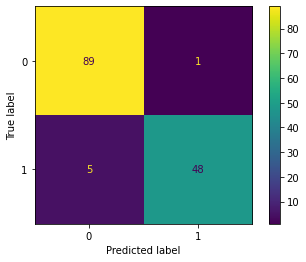

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show();

## In the following code cells, let's manually calculate the metrics covered earlier on our deck.

## Calculate recall
---

<details>
    <summary>Need a hint?</summary>
    Recall = Sensitivity.
    TP/TP+FN.
</details>

In [13]:
48 / (48 + 5)

0.9056603773584906

## How many Type I errors are there?
---

<details>
    <summary>Need a hint?</summary>
    Type I = False positive
</details>

In [14]:
1

1

## How many Type II errors are there?
---
<details>
    <summary>Need a hint?</summary>
    Type II = False negatives
</details>

In [15]:
5

5

## In this problem's context, which error is worse - Type I vs Type II?
---

<details>
    <summary>Need a hint?</summary>
    It is a more serious issue to <b>overlook</b> or in other words, miss those that actually have malignant tumor
</details>

In [16]:
# Type II, because the patient ACTUALLY has a malignant tumor but our model is telling them otherwise
# The decision of which metric is important depends on the knowledge of the domain of your problem. 
# Domain knowledge is important in Data Science!

## Calculate the precision
---

<details>
    <summary>Need a hint?</summary>
    TP/TP+FP
</details>

In [17]:
48 / (48 + 1)

0.9795918367346939

## Calculate the specificity
---

<details>
    <summary>Need a hint?</summary>
    TN/TN+FP
</details>

In [18]:
89 / (89 + 1)

0.9888888888888889

# Bonus
- Precision and Recall can be calculated with single lines of code in sklearn

In [19]:
# Import the functions
from sklearn.metrics import precision_score, recall_score

In [20]:
# Precision
precision = precision_score(y_test, pred)
precision

0.9795918367346939

In [21]:
# Recall
recall = recall_score(y_test, pred)
recall

0.9056603773584906

---